Missing values in 'isFraud': 1


<ipython-input-3-f993ddf9b3a3>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldbalanceDest'].fillna(0, inplace=True)
<ipython-input-3-f993ddf9b3a3>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

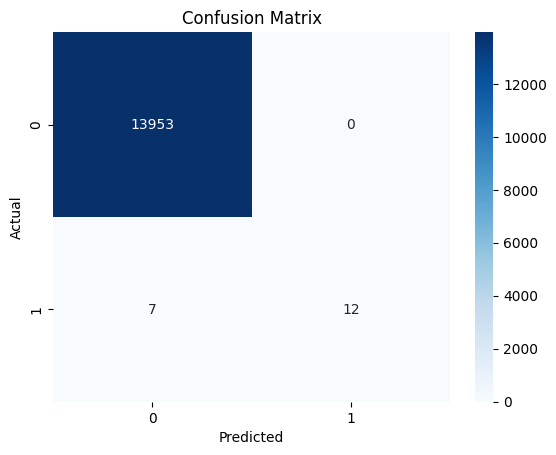

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13953
         1.0       1.00      0.63      0.77        19

    accuracy                           1.00     13972
   macro avg       1.00      0.82      0.89     13972
weighted avg       1.00      1.00      1.00     13972

ROC-AUC Score: 0.9729788349609779


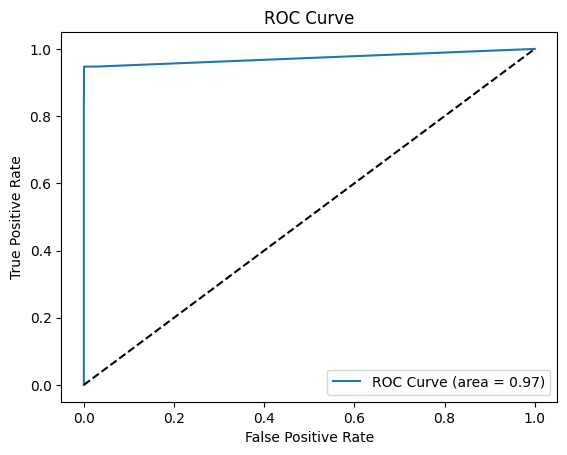

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('/content/Fraud.csv')

# Step 2:Data cleaning is an essential first step before building any model.
#I deal with missing values, detect outliers, and address multi-collinearity (if present).
print("Missing values in 'isFraud':", df['isFraud'].isnull().sum())

# Option 1: Remove rows where 'isFraud' is NaN
df = df.dropna(subset=['isFraud'])

# Step 3: Data preprocessing

# One-hot encoding for the 'type' variable (transaction type)
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Handle missing values in 'oldbalanceDest' and 'newbalanceDest' for merchants
df['oldbalanceDest'].fillna(0, inplace=True)
df['newbalanceDest'].fillna(0, inplace=True)

#By analyzing feature importances,I have determine which variables play a key role in predicting fraud.
#Key factors might include:
#Transaction amount: Unusually large amounts may indicate fraud.
#Balance differences: Large differences in balances before and after a transaction can be a red flag.
#Transaction type: Certain types of transactions, like cash-out or transfers, are more prone to fraud.
#Yes, these factors make sense because:
#Fraudsters often attempt to withdraw large sums from compromised accounts.
#Fraudulent transactions often involve a significant change in account balances.
#Certain types of transactions, like transfers, are used more frequently in fraud
df['balanceOrigDiff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDestDiff'] = df['oldbalanceDest'] - df['newbalanceDest']

# Drop unnecessary columns (nameOrig and nameDest)
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Step 4: Split the data into features (X) and target (y)
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)  # 'isFraud' is the target variable
y = df['isFraud']

# Step 5:I have used RandomForestClassifier for fraud detection since it handles large datasets, complex patterns.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 8:I have used several metrics to evaluate the performance of the fraud detection model, including:
#Confusion Matrix
#ROC-AUC Curve
#Classification Report
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random predictions
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Based on the fraud detection insights, the company could adopt the following preventive measures:
# - Transaction Limits
# - Real-time Monitoring
# - Two-Factor Authentication
# - Customer Alerts
# How to Determine if Prevention Measures Work?
# - Compare Before and After
# - Track Flagged Transactions
# - Customer Feedback


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
X = df.iloc[:,:-2]
y= df.iloc[:,-2]

In [ ]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00
